# Principal Component Analysis

In this exercies, we will use principal component analysis (PCA) to perform dimensionality reduction. We will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

## Part 1: Load Example Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [2]:
data = scipy.io.loadmat('ex7data1.mat')
X = data['X']

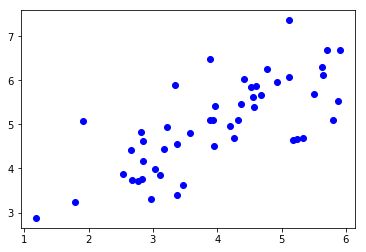

In [3]:
# visualize the example dataset
plt.plot(X[:,0], X[:,1], 'bo')
plt.show()

## Part 2: Principal Component Analysis

In [4]:
# featureNormalize() normalizes the features in X
# it returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
def featureNormalize(X):
    mu = np.mean(X,0)
    sigma = np.std(X, 0, ddof = 1)
    X_norm = np.zeros([X.shape[0], X.shape[1]])
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [5]:
# pcs() run principal component analysis on the dataset X,
# it computes eigenvectors of the covariance matrix of X
# and returns the eigenvectors U, the eigenvalues in S
def pca(X):
    m = X.shape[0]
    n = X.shape[1]
    Sigma = np.dot(X.T, X)/float(m)
    U, S, V = np.linalg.svd(Sigma, full_matrices=True)
    return U, S

In [6]:
# before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)
# run PCA
U, S = pca(X_norm)

In [7]:
# drawline() draws a line form point p1 to point p2
def drawLine(p1,p2, **kwargs):
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],'-k', **kwargs)

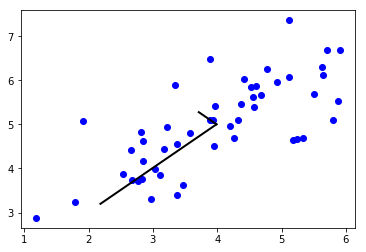

In [8]:
# display data, and draw the eigenvectors centered at mean of data.
# These lines show directions of maximum variations in the dataset
plt.plot(X[:,0], X[:,1], 'bo')
endpoint1 = mu + 1.5* np.dot(S[0],U[:,0].T)
drawLine(mu, endpoint1, linewidth = 2)
endpoint2 = mu + 1.5* np.dot(S[1],U[:,1].T)
drawLine(mu, endpoint2, linewidth = 2)
plt.show()

In [9]:
print('Top eigenvector:')
print(U[:,1])

Top eigenvector:
[-0.70710678  0.70710678]


## Part 3: Dimension Reduction

In [10]:
# projectData() computes the reduced data representation when projecting only on to the top k eigenvectors
def projectData(X, U, K):
    Z = np.dot(X, U[:,0:K])
    return Z

In [11]:
# recoverData() recovers an approximation of the original data when using the projected data
# it recovers an approximation the original data that has been reduced to K dimensions.
# it ruturns the approximate reconstruction in X_rec
def recoverData(Z, U, K):
    X_rec = np.dot(Z, U[:,0:K].T)
    return X_rec

In [12]:
# project the data onto k= 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('projection of the first example: {}'.format(Z[0]))

projection of the first example: [1.48127391]


In [13]:
# recover data onto 2 dimension
X_rec  = recoverData(Z, U, K)
print('Approximatio nof the first example: {}'.format(X_rec[0,:]))

Approximatio nof the first example: [-1.04741883 -1.04741883]


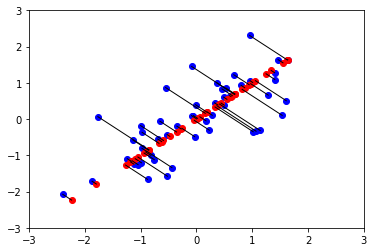

In [14]:
# draw lines connecting the projected points to the original points
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.plot(X_rec[:,0], X_rec[:,1],'ro')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:], linewidth = 1)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

## Part 5: PCA on Face Data: Eigenfaces

In this part, we will run PCA on face imgaes to see how it can be used in practice for dimension reduction. The dataset contains a dataset of face images, each 32 by 32 in grayscale. Each row corresponds to one face image.

In [15]:
# load data
faces = scipy.io.loadmat('ex7faces.mat')
X = faces['X']

In [16]:
# displayData() display 2D data
def displayData(X):
    m = X.shape[0]
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m/display_rows))
    fig, ax = plt.subplots(display_rows, display_cols,figsize=(10, 10))
    curr_ex = 0
    for i in range(display_rows):
        for j in range(display_cols):
            num = i*display_cols + j
            image_reshape = X[curr_ex,:].reshape(32,32)
            ax[i,j].imshow(image_reshape.T)
            ax[i,j].tick_params(labelbottom=False, labelleft = False)
            curr_ex += 1
    plt.show()

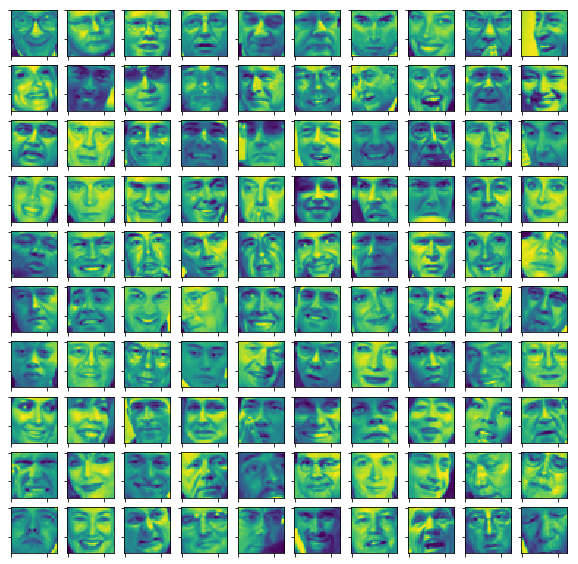

In [17]:
# display the first 100 faces in the dataset
displayData(X[0:100, :])
plt.show()

## Part 5: PCA on Face Data: Eigenfaces

In [18]:
# normalize X
X_norm, mu, sigma = featureNormalize(X)
# run PCA
U, S = pca(X_norm)

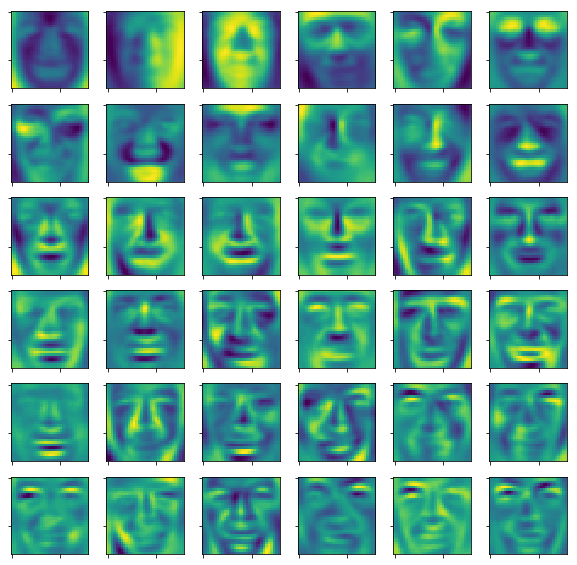

In [19]:
# visualize the top 36 eigenvectors found
displayData(U[:, 0:36].T)

## Part 6: Dimension Reduction for faces

Project images to the eigen space using the top k eigenvectors

In [20]:
K = 100
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)

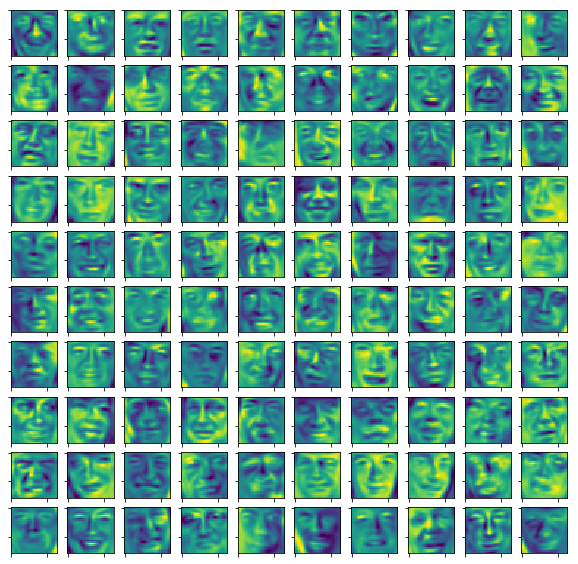

In [21]:
# visualize faces after PCA Dimension Reduction
displayData(X_rec[0:100,:])
plt.show()

## Part 7: PCA for visualization

One useful application of PCA is to use it to visualize high-dimensional data. In this K-Means exercise we run K-Mean on 3 dimensional pixel colors of an image. We first visualize output in 3D, and then apply PCA to obtain a visualization in 2D

In [22]:
# load data
from scipy import misc
A = misc.imread('bird_small.png')
A = A/float(255)
img_size = A.shape

C:\Users\xyguo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# the following functions copyed from ex7 k-means clustering exercies
def kMeansInitCentroids(X, K):
    centroids = np.zeros([K, X.shape[1]])
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K], :]
    return centroids
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros([m,])
    for i in range(m):
        sd = []
        for j in range(K):
            d = X[i,:] - centroids[j,:]
            sd.append(np.dot(d, d.T))
        ind = np.argmin(sd)
        idx[i] = int(ind)
    return idx
def computeCentroids(X, idx, K):
    m = X.shape[0]
    n = X.shape[1]
    centroids = np.zeros([K, n])
    for i in range(K):
        C_i = None
        for j in range(m):
            X_j = X[j,:].reshape([1,n])
            if idx[j] == i:
                if C_i is not None:
                    C_i = np.append(C_i, X_j, 0)
                else:
                    C_i = X_j
        centroids[i,:] = np.mean(C_i, 0)
    return centroids
def runkMeans(X, initial_centroids, max_iters, plot_progress):
    m = X.shape[0]
    n = X.shape[1]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros([m,])
    # run K-means
    for i in range(max_iters):
        #print('k-means iteration {}'.format(i+1))
        # for each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        # given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
        #print(centroids)
    return centroids, idx

In [24]:
# run k-means
X = A.reshape([img_size[0]*img_size[1], 3])
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)

In [25]:
# sample 1000 random indexes 
np.random.seed(1)
sel = np.floor(np.random.rand(1000,) * X.shape[0]) + 1
sel = [int(item) for item in sel] 

In [26]:
from mpl_toolkits.mplot3d import Axes3D

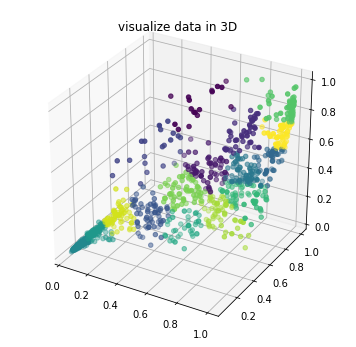

In [27]:
# visualize the data and centroid memberships in 3D
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[sel,0], X[sel,1], X[sel, 2], c = idx[sel])
plt.title('visualize data in 3D')
plt.show()

In [28]:
# use PCA to project this cloud to 2D for visualization
# subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)
# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

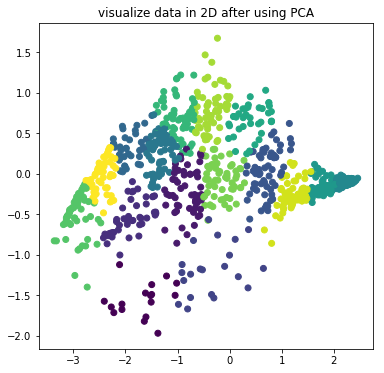

In [29]:
# plot in 2D
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.scatter(Z[sel,0], Z[sel,1] , c = idx[sel])
plt.title('visualize data in 2D after using PCA')
plt.show()